In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [2]:
# download stopwords, punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gazia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gazia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [3]:
# load twitter_dataset
import pandas as pd
tweets = pd.read_csv('twitter_dataset.csv')

In [33]:
tweets

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21
...,...,...,...,...,...,...
9995,9996,ntate,Agree reflect military box ability ever hold. ...,81,86,2023-01-15 11:46:20
9996,9997,garrisonjoshua,Born which push still. Degree sometimes contro...,73,100,2023-05-06 00:46:54
9997,9998,adriennejackson,You day agent likely region. Teacher data mess...,10,62,2023-02-27 14:55:08
9998,9999,kcarlson,Guess without successful save. Particular natu...,21,60,2023-01-09 16:09:35


In [5]:
# combine all tweets into one string
all_tweets = ' '.join(tweets['Text'])

In [55]:
all_tweets[:500]

'Party least receive say or single. Prevent prevent husband affect. May himself cup style evening protect. Effect another themselves stage perform.\nPossible try tax share style television with. Successful much sell development economy effect. Hotel still Congress may member staff. Media draw buy fly. Identify on another turn minute would.\nLocal subject way believe which question some message. Own all imagine join agency indicate. Nice be her debate industry that year. Film where generation push d'

In [56]:
# tokenize the text into individual words
tokens = word_tokenize(all_tweets)

In [58]:
tokens[:10]

['Party',
 'least',
 'receive',
 'say',
 'or',
 'single',
 '.',
 'Prevent',
 'prevent',
 'husband']

In [59]:
# remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word != '.']

In [61]:
filtered_tokens[:10]

['Party',
 'least',
 'receive',
 'say',
 'single',
 'Prevent',
 'prevent',
 'husband',
 'affect',
 'May']

In [62]:
# calculate word frequency distribution
fdist = FreqDist(filtered_tokens)
top_words = fdist.most_common(20)

In [63]:
# print the top words
for word, frequency in top_words:
    print(f'{word}, {frequency}')

American, 346
tax, 344
Democrat, 343
hard, 343
maybe, 339
Republican, 336
Congress, 335
job, 331
want, 327
young, 327
wear, 327
yard, 326
TV, 325
boy, 324
forget, 324
cell, 323
exactly, 322
high, 322
level, 321
add, 321


In [66]:
words, frequencies = zip(*top_words)

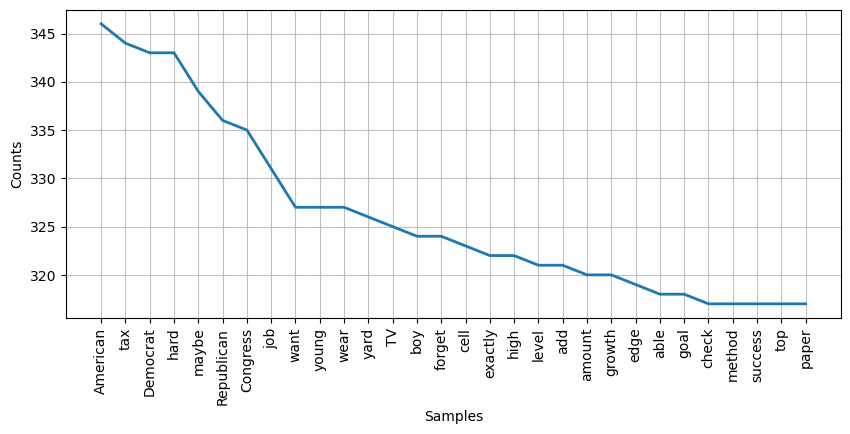

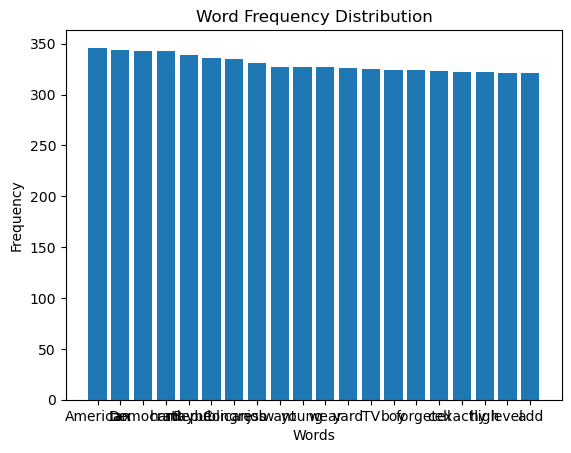

In [71]:
# plot word frequency distribution
plt.figure(figsize=(10, 4))
fdist.plot(30, cumulative=False)
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution')
plt.show()